<a href="https://colab.research.google.com/github/MINJILEE-PURDUE/machinelearning/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Chapter2: How to train and test ML model

Main categories of ML are supervised learning, unsupervised learning, and reinforcement learning. Supervised learning involves using both input data and corresponding target labels (answers) for training the model.

In [65]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [66]:
fish_data = [[l, w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [67]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [68]:
print(fish_data[4])

[29.0, 430.0]


In [69]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [70]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

If you set aside the last 14 instances as the test set in this way, the training set does not contain any smelts. Therefore, if you train the model without any smelt in the training set, it cannot correctly classify smelts. The phenomenon where the training set and the test set are poorly constructed, failing to represent the entire dataset, is referred to as *sampling bias*.

The training data and the testing data should have a balanced mix of bream and smelt. Before dividing the dataset into training and testing sets, it is necessary to either shuffle the data or randomly sample to create a representative training set and test set. To handle such tasks, one needs to learn about a new Python library called *NumPy*.

In [71]:
import numpy as np

In [72]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [73]:
print(input_arr)
print(input_arr[:,0]) # from the beginning to the end of raw (,) and the first column
print(input_arr[0,:]) # the first raw, and from the beginning to the end

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[25.4 26.3 26.5 29.  29.  29.7 29.7 30.  30.  30.7 31.  31.  31.5 32.
 32.  32.  33.  33.  33.5 33.5 34.  34.  34.5 35.  35.  35.  35.  36.
 36.  37.  38.5 38.5 39.5 

In [74]:
print(input_arr.shape) # number of sample(s), number of feature(s)

(49, 2)


In [75]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [76]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [77]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [78]:
train_input = input_arr[index[:35]]
train_target = input_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = input_arr[index[35:]]

<function matplotlib.pyplot.show(close=None, block=None)>

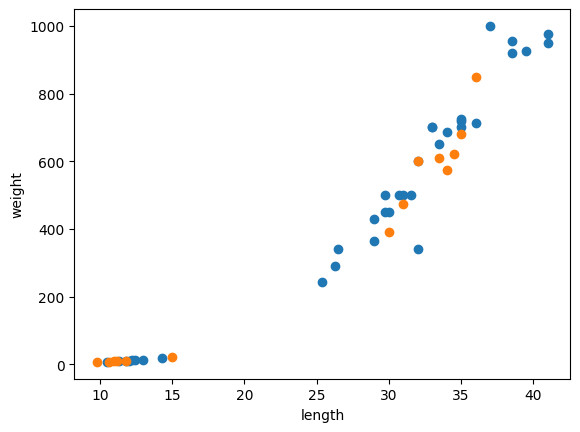

In [79]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) # plt.scatter(train_input[0:,0], train_input[0:,1]). In other words, take all values from the 0th column for all rows.
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [80]:
print(train_input[:,0])

[32.  12.4 14.3 12.2 33.  36.  35.  35.  38.5 33.5 31.5 29.  41.  30.
 29.  29.7 11.3 11.8 13.  32.  30.7 33.  35.  41.  38.5 25.4 12.  39.5
 29.7 37.  31.  10.5 26.3 34.  26.5]


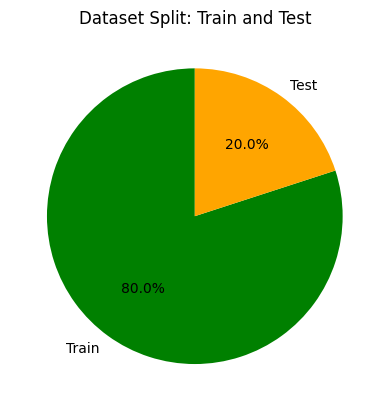